In [ ]:
# 1. Import Library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 2. Load Dataset
df = pd.read_csv('/content/depressionstudentdataset.csv')

In [ ]:
# 3. Tampilkan semua dataset
df.head(502)

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
497,Male,26,5.0,2.0,More than 8 hours,Unhealthy,No,8,3,No,Yes
498,Male,24,2.0,1.0,Less than 5 hours,Unhealthy,Yes,8,5,No,Yes
499,Female,23,3.0,5.0,5-6 hours,Healthy,No,1,5,Yes,No
500,Male,33,4.0,4.0,More than 8 hours,Healthy,No,8,1,Yes,No


In [ ]:
# 4. Tampilkan jumlah data set dalam baris dan kolom
print(f'Dataset ini terdiri dari {df.shape[0]} baris dan {df.shape[1]} kolom')

Dataset ini terdiri dari 502 baris dan 11 kolom


In [ ]:
# 5. Tampilkan semua atribut yang dijadikan kategori
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

In [ ]:
print(df.columns)

Index(['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


In [ ]:
# 6. Tampilkan data dalam tabel lebih detail pada tipe data numerik saja
df.describe()

,Age,Academic Pressure,Study Satisfaction,Study Hours,Financial Stress
count,502.000000,502.000000,502.000000,502.000000,502.000000
mean,26.241036,3.003984,3.075697,6.404382,2.928287
std,4.896501,1.390007,1.373490,3.742434,1.425053
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,22.000000,2.000000,2.000000,3.000000,2.000000
50%,26.500000,3.000000,3.000000,7.000000,3.000000
75%,30.000000,4.000000,4.000000,10.000000,4.000000
max,34.000000,5.000000,5.000000,12.000000,5.000000


In [ ]:
# 7. Tampilkan rata rata berdasarkan umurnya
df['Age'].aggregate(['min','max','mean'])

,Age
min,18.000000
max,34.000000
mean,26.241036


In [ ]:
# 8. Tampilkan berdasarkan waktu tidur
df['Sleep Duration'].value_counts()

,count
Sleep Duration,
7-8 hours,128
More than 8 hours,128
5-6 hours,123
Less than 5 hours,123


In [ ]:
# 9. Tampilkan berdasarkan riwayat
df['Have you ever had suicidal thoughts ?'].value_counts()

,count
Have you ever had suicidal thoughts ?,
Yes,260
No,242


Text(0.5, 1.0, 'Distribusi Umur (Tidak Depresi)')

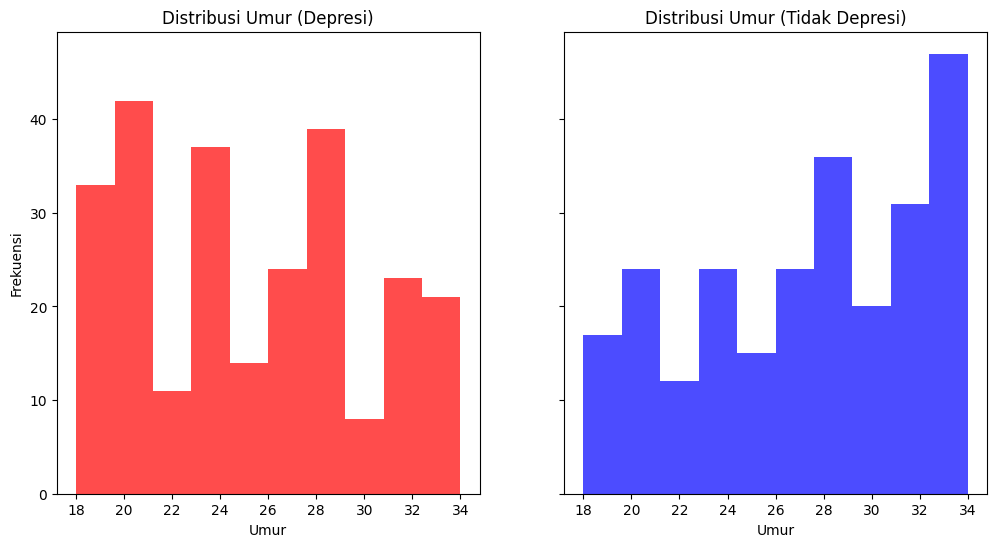

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# 10. Histogram untuk orang yang depresi
axis[0].hist(df[df['Depression'] == 'Yes']['Age'], bins=10, color='red', alpha=0.7)
axis[0].set_xlabel('Umur')
axis[0].set_ylabel('Frekuensi')
axis[0].set_title('Distribusi Umur (Depresi)')

# 11. Histogram untuk orang yang tidak depresi
axis[1].hist(df[df['Depression'] == 'No']['Age'], bins=10, color='blue', alpha=0.7)
axis[1].set_xlabel('Umur')
axis[1].set_title('Distribusi Umur (Tidak Depresi)')

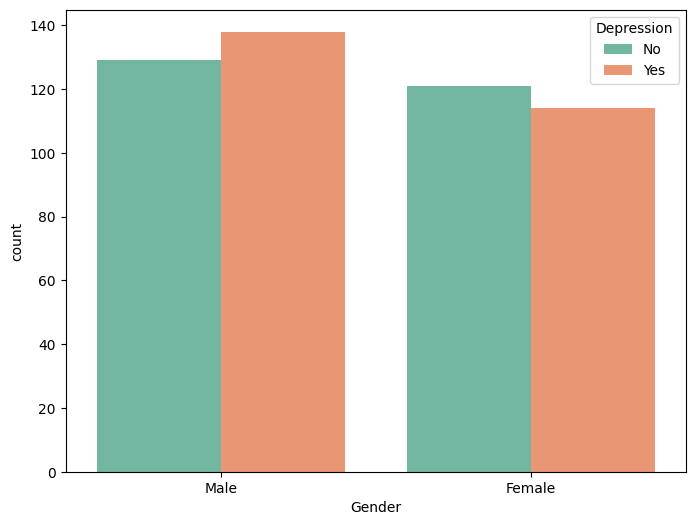

In [ ]:
# 12. Tampilkan histogram berdasarkan jenis kelamin
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Depression', data=df, palette='Set2');

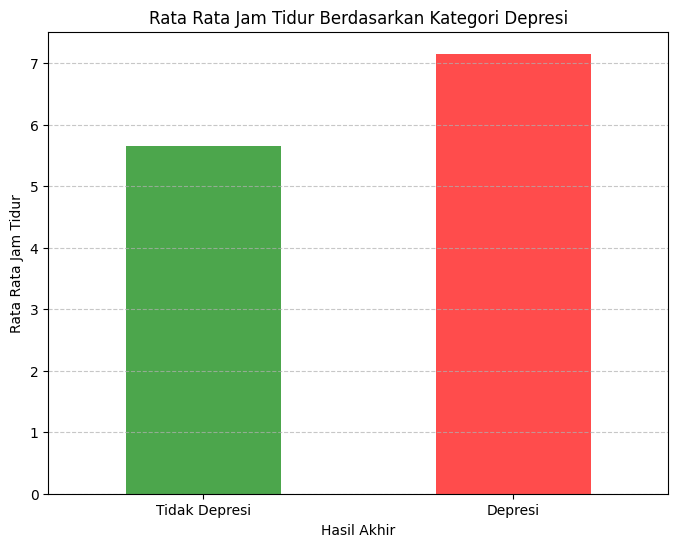

In [ ]:
# 13. Tampilkan histogram berdasarkan jam tidur
average_sleep = df.groupby('Depression')['Study Hours'].mean()

plt.figure(figsize=(8, 6))
average_sleep.plot(kind='bar', color=['green', 'red'], alpha=0.7)

plt.xticks(ticks=[0, 1], labels=['Tidak Depresi', 'Depresi'], rotation=0)
plt.xlabel('Hasil Akhir')
plt.ylabel('Rata Rata Jam Tidur')
plt.title('Rata Rata Jam Tidur Berdasarkan Kategori Depresi')
plt.grid(axis='y', linestyle='--', alpha=0.7)

Text(0.5, 1.0, 'Distribusi Skor Academic Pressure')

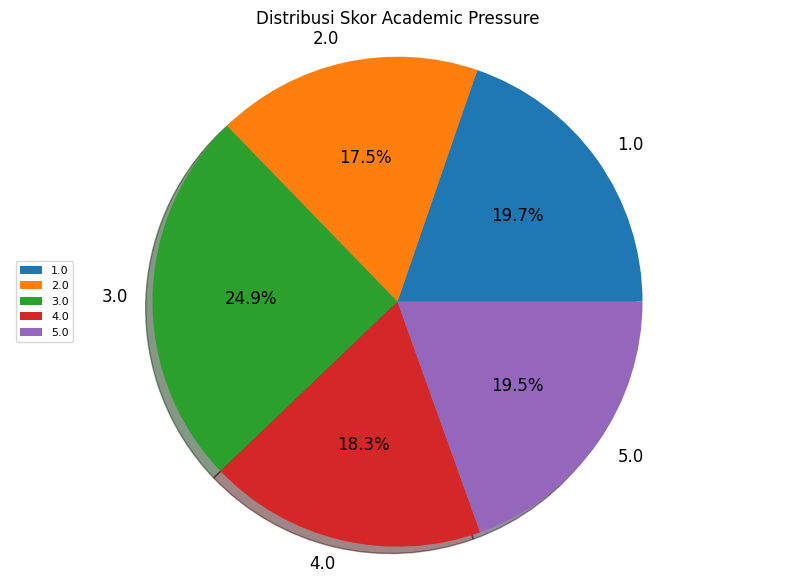

In [ ]:
# 14. Tampilkan diagram lingkaran berdasarkan tekanan akademiknya
Academic_Pressure = df['Academic Pressure'].value_counts().sort_index()

# Membuat diagram lingkaran
plt.figure(figsize=(10, 7))

plt.style.use('default')
plt.pie(Academic_Pressure, labels=Academic_Pressure.index, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 12, 'weight': 'regular'})

# Menambahkan legenda dan pengaturan lainnya
plt.legend(loc="center left", prop={'size': 8})
plt.axis('equal')  # Agar lingkaran terlihat simetris
plt.title('Distribusi Skor Academic Pressure')

In [ ]:
# 15. Cek Duplikasi Data
data = df.duplicated()

# Menampilkan jumlah data yang terduplikasi
print(f"Jumlah baris yang terduplikasi: {data.sum()}")

# Menampilkan data yang terduplikasi
duplicated_data = data[data]
print("Data yang terduplikasi:")
print(duplicated_data)

Jumlah baris yang terduplikasi: 0
Data yang terduplikasi:
Series([], dtype: bool)


In [ ]:
# 16. Cek Kekosongan Data
missing_data = data.isnull().sum()

# Tampilkan jumlah data kosong per kolom
print("Jumlah nilai kosong per kolom:")
print(missing_data)

Jumlah nilai kosong per kolom:
0


In [ ]:
data = pd.read_csv('/content/depressionstudentdataset.csv')

# 2. Preprocessing
data = data.dropna()  # Drop rows with missing values
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# 3. Split Data
X = data.drop("Depression", axis=1)
y = data["Depression"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# 4. Train Decision Tree
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)


Classification Report:
              precision    recall  f1-score   support

          No       0.83      0.85      0.84        71
         Yes       0.86      0.85      0.86        80

    accuracy                           0.85       151
   macro avg       0.85      0.85      0.85       151
weighted avg       0.85      0.85      0.85       151



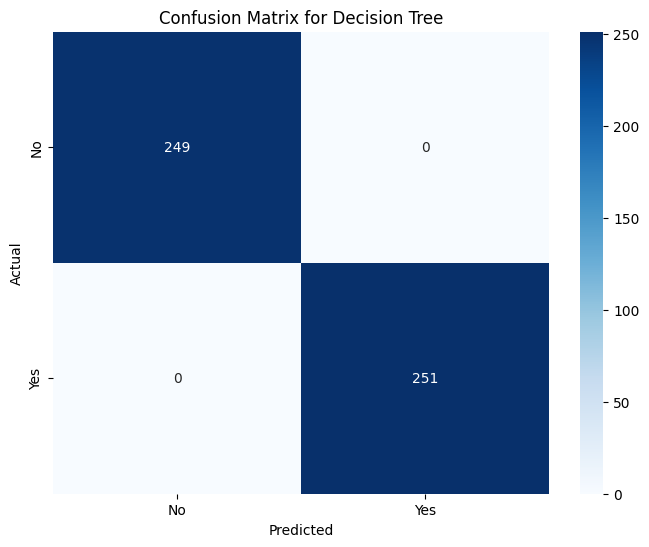

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Muat dataset
data = pd.read_csv('/content/depressionstudentdataset.csv')

# Encoding data kategorikal
encoder = LabelEncoder()
for column in data.select_dtypes(include="object").columns:
    data[column] = encoder.fit_transform(data[column])

# Membagi fitur dan target
X = data.drop("Depression", axis=1)  # Fitur
y = data["Depression"]  # Target

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Latih model Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)  # Gunakan DecisionTreeClassifier
tree_clf.fit(X_train, y_train)

# Prediksi data uji
y_pred = tree_clf.predict(X_test)

# Classification report
report = classification_report(y_test, y_pred, target_names=["No", "Yes"])
print("\nClassification Report:")
print(report)

# 3. Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()